#**Prediction Using Supervised ML** 

*   The Task is to predict the percentage of an student based on the no. of study hours
*   The solution is to create a simple linear regression (involves only 2 variables). 
*   Answers the question : What will be predicted score if a student studies for 9.25 hrs/day?

***Author: Andrijana Zivic***


# Loading the dataset 

In [51]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

In [52]:
#reading the data & displaying dataset
df= pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To find the correlation between the data in this task, it is enough to plot data points on a 2-D graph and manually take a look on dataset.

# Relationship between the data 

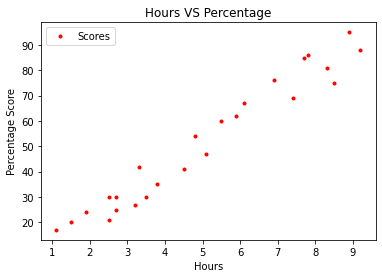

In [11]:
#plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='.', color='red')
plt.title('Hours VS Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. The aim of regression analysis is to determine the regression model that best describes the relationship between the phenomenon and to estimation model and predicted values of the dependent variable Y for selected values of the explanatory variable X.
In order to create a regression model, it is initially necessary to prepare and train data.

# Preparing the data

The 20% will be used for testing, and the 80% will make a training set.

In [34]:
#division of the data into "attributes" (inputs) and "labels" (outputs) --slicing 
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

#spliting this data into training and test sets.
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size =0.2, random_state=0)

# Training the Algorithm

In [56]:
lm = LinearRegression()
lm.fit(x_train,y_train)

#display of the model coefficient 
print("Training complete. Coefficient: ", lm.coef_)
#The bigger the coefficient is the bigger is the impact on the regression

Training complete. Coefficient:  [9.91065648]


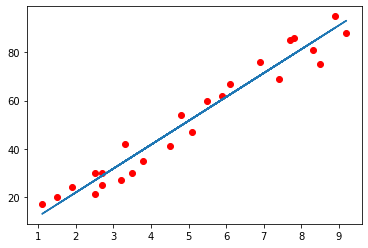

In [57]:
#regression line display (Y=kX+ε)
line = lm.coef_*x+lm.intercept_

plt.scatter(x, y, color='red')
plt.plot(x, line);
plt.show()

# Making Predictions


In [58]:
#prediction on test data
y_prediction_t=lm.predict(x_test)
df2= pd.DataFrame({'Actual values': y_test, 'Predicted values': y_prediction_t})
df2

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [59]:
#prediction on train data
y_prediction_tr=lm.predict(x_train)
df2= pd.DataFrame({'Actual values': y_train, 'Predicted values': y_prediction_tr})
df2.head(5)

,Actual values,Predicted values
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882


# Testing model reliability

Mean absolute error (MAE) measures the averarge strength of errors in the predicted set, disregarding their direction. That is the average for the test sample of absolute differences between a prediction and real observation, where all of the individual differences are of the same weight and negatively oriented. 
The end testing of reliability will be done by calculating the determination coefficient, that is by determining the data deviation from its assumed value determined by the formula.

In [68]:
hours = 9.25
hours_np= np.asarray(hours)
hours_reshape= hours_np.reshape(-1,1)
result = lm.predict(hours_reshape)
print(f"If Student studies for {hours} hrs/day then the predicted score will be {round(result[0],1)} \n")

print('MAE:', metrics.mean_absolute_error(y_test, y_prediction_t)) 

SS_Residual = sum((y_test-y_prediction_t)**2)
SS_Total = sum((y_test-np.mean(y_test))**2) 
r_squared = 1 - (float(SS_Residual))/SS_Total
print('R Squared:', r_squared)

If Student studies for 9.25 hrs/day then the predicted score will be 93.7 

MAE: 4.183859899002982
R Squared: 0.9454906892105354


The value of the determination coefficient is almost 1, so the relationship between predicted and actual data is very strong and the regression model is reliable. 